# Pokemon API

This is primarily for exploring the pokemon api at https://pokeapi.co/ for a bit of fun.

In [91]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import requests
import json
from IPython.core.display import Image, display
from IPython.display import Image, Markdown
import random

#### A wild Entei appeared!

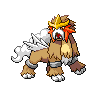

In [102]:
generations = [151, 252, 802]
pokemon_number = random.randint(1, generations[1])

pokemon_url = 'http://pokeapi.co/api/v2/pokemon/{}/'.format(pokemon_number)
response_json = requests.get(pokemon_url).json()

pokemon_name = response_json['name'].title()
sprites = response_json['sprites']
sprite_url = sprites['front_default']

display(Markdown("#### A wild {} appeared!".format(pokemon_name)))
display(Image(sprite_url))

In [103]:
for sprite_name in sprites:
    sprite_url = sprites[sprite_name]
    if sprite_url is not None:
        display(Image(url=sprite_url))

In [104]:
pokemon_move = response_json['moves'][0]['move']['name'].title()
display(Markdown("#### {} just learned {}!".format(pokemon_name, pokemon_move)))

#### Entei just learned Cut!

In [105]:
pokemon_moves = response_json['moves']

display(Markdown("#### These are the moves {} can learn:\n".format(pokemon_name)))

for move in pokemon_moves:
    move_name = move['move']['name'].title()
    level_learned_at = move['version_group_details'][0]['level_learned_at']
    print('{0:15}{1}'.format(move_name, level_learned_at))

#### These are the moves Entei can learn:


Cut            0
Stomp          29
Headbutt       0
Body-Slam      0
Double-Edge    0
Leer           1
Bite           1
Roar           0
Ember          8
Flamethrower   0
Hyper-Beam     0
Strength       0
Solar-Beam     0
Fire-Spin      22
Dig            0
Toxic          0
Mimic          0
Double-Team    0
Reflect        0
Fire-Blast     0
Swift          0
Flash          0
Rest           0
Substitute     0
Snore          0
Curse          0
Protect        0
Mud-Slap       0
Detect         0
Sandstorm      0
Endure         0
Swagger        0
Sleep-Talk     0
Return         0
Frustration    0
Sacred-Fire    1
Iron-Tail      0
Hidden-Power   0
Rain-Dance     0
Sunny-Day      0
Psych-Up       0
Shadow-Ball    0
Rock-Smash     0
Heat-Wave      0
Will-O-Wisp    0
Facade         0
Eruption       85
Secret-Power   0
Overheat       0
Extrasensory   64
Calm-Mind      0
Natural-Gift   0
Giga-Impact    0
Fire-Fang      50
Rock-Climb     0
Lava-Plume     57
Iron-Head      0
Stone-Edge     0
Flame-Ch

In [106]:
display(Markdown("#### {}'s base stats".format(pokemon_name)))

stats_json = response_json['stats']

base_stats = {}
for stat in stats_json:
    stat_name = stat['stat']['name'].title()
    base_stat = stat['base_stat']
    print("{0:15}  {1}".format(stat_name, base_stat))

#### Entei's base stats

Speed            100
Special-Defense  75
Special-Attack   90
Defense          85
Attack           115
Hp               115


In [107]:
pokemon_index = random.sample(range(1, 100), 3)

df = DataFrame()

responses = []
for index in pokemon_index:
    response_json = requests.get('http://pokeapi.co/api/v2/pokemon/{}/'.format(index)).json()
    name = response_json['name'].title()
    print(name)
    for stat in response_json['stats']:
        stat_name = stat['stat']['name']
        base_stat = stat['base_stat']
        print("{0:15}  {1}".format(stat_name, base_stat))
    print()

Jigglypuff
speed            20
special-defense  25
special-attack   45
defense          20
attack           45
hp               115

Dodrio
speed            100
special-defense  60
special-attack   60
defense          70
attack           110
hp               60

Ekans
speed            55
special-defense  54
special-attack   40
defense          44
attack           60
hp               35



Possible Ideas: 

Graph the stats amongst each of the pokemon to determine who is best for attack, defense, etc

In [108]:
res = requests.get("http://pokeapi.co/api/v2/location/67/").json()
print(json.dumps(res, indent=4))

{
    "name": "celadon-city",
    "region": {
        "url": "http://pokeapi.co/api/v2/region/1/",
        "name": "kanto"
    },
    "game_indices": [
        {
            "generation": {
                "url": "http://pokeapi.co/api/v2/generation/4/",
                "name": "generation-iv"
            },
            "game_index": 144
        }
    ],
    "names": [
        {
            "name": "Celadon City",
            "language": {
                "url": "http://pokeapi.co/api/v2/language/9/",
                "name": "en"
            }
        },
        {
            "name": "C\u00e9ladopole",
            "language": {
                "url": "http://pokeapi.co/api/v2/language/5/",
                "name": "fr"
            }
        }
    ],
    "id": 67,
    "areas": [
        {
            "url": "http://pokeapi.co/api/v2/location-area/558/",
            "name": "celadon-city-area"
        },
        {
            "url": "http://pokeapi.co/api/v2/location-area/283/",
         

In [109]:
r = requests.get('http://pokeapi.co/api/v2/pokemon/1/')
json_j = r.json()

for attr in json_j:
    print(attr)

forms
abilities
stats
name
weight
moves
sprites
held_items
location_area_encounters
height
is_default
species
id
order
game_indices
base_experience
types
